# ai4 for health related matters

## dependencies

In [103]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

## dataset stuff

### read the dataset

In [104]:
df = pd.read_csv('dataset.csv')
df = df.sample(frac = 1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
112,52,1,1,118,186,0,2,190,0,0.0,2,0.0,6.0,0
250,57,1,4,110,201,0,0,126,1,1.5,2,0.0,6.0,0
42,71,0,2,160,302,0,0,162,0,0.4,1,2.0,3.0,0
276,66,0,3,146,278,0,2,152,0,0.0,2,1.0,3.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,54,0,3,108,267,0,2,167,0,0.0,1,0.0,3.0,0
25,50,0,3,120,219,0,0,158,0,1.6,2,0.0,3.0,0
121,63,0,4,150,407,0,2,154,0,4.0,2,3.0,7.0,4
235,54,1,4,122,286,0,2,116,1,3.2,2,2.0,3.0,3


### train_test split

In [105]:
ratio = 0.9 # 90:10 train:test ratio
train_set = df.sample(frac=ratio)

# Dropping all those indexes from the dataframe that exists in the train_set
test_set = df.drop(train_set.index)
train_set.shape, test_set.shape

train_set
test_set

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
13,44,1,2,120,263,0,0,173,0,0.0,1,0.0,7.0,0
92,62,1,3,130,231,0,0,146,0,1.8,2,3.0,7.0,0
113,43,0,4,132,341,1,2,136,1,3.0,2,0.0,7.0,2
148,45,1,2,128,308,0,2,170,0,0.0,1,0.0,3.0,0
218,64,0,4,130,303,0,0,122,0,2.0,2,2.0,3.0,0
186,42,1,3,120,240,1,0,194,0,0.8,3,0.0,7.0,0
211,38,1,1,120,231,0,0,182,1,3.8,2,0.0,7.0,4
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
128,44,1,2,120,220,0,0,170,0,0.0,1,0.0,3.0,0
29,40,1,4,110,167,0,2,114,1,2.0,2,0.0,7.0,3


### formating

In [106]:
# import training dataset

# Clean column names
train_set.columns = train_set.columns.str.strip()

# Handle missing values represented by '?'
train_set = train_set.replace('?', np.nan)

# Convert columns to numeric, drop rows with NaNs
train_set = train_set.dropna()
train_set = train_set.astype(float)

# Split features and labels
X = train_set.drop("diagnosis", axis=1)
y = train_set["diagnosis"]

y = (y > 0.5).astype(float)  # Ensures only 0 or 1

# normalise featuress from minmax scaling (sklearn)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
inputs = torch.tensor(X_scaled, dtype=torch.float32)
targets = torch.tensor(y.values, dtype=torch.float32)

print(inputs.shape, targets.shape)

torch.Size([267, 13]) torch.Size([267])


In [107]:
# Clean column names
test_set.columns = test_set.columns.str.strip()

# Handle missing values represented by '?'
test_set = test_set.replace('?', np.nan)

# Convert columns to numeric, drop rows with NaNs
test_set = test_set.dropna()
test_set = test_set.astype(float)

# Split features and labels
X_test = test_set.drop("diagnosis", axis=1)
y_test = test_set["diagnosis"]
y_test = (y_test > 0.5).astype(float)  # Ensures only 0 or 1

# Use the same scaler as for training
X_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
test_tensor = torch.tensor(X_scaled, dtype=torch.float32)
test_target = torch.tensor(y_test.values, dtype=torch.float32)

print(test_tensor.shape, test_target.shape)

torch.Size([30, 13]) torch.Size([30])


## AI1

### setup/params

In [108]:
class SimpleNN(nn.Module): 
    def __init__(self): 
        super(SimpleNN, self).__init__() 
        self.fc1 = nn.Linear(13, 26)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(26, 1)
        
    def forward(self, x): 
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x  # No sigmoid here; use BCEWithLogitsLoss

model = SimpleNN()
print(model)

SimpleNN(
  (fc1): Linear(in_features=13, out_features=26, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=26, out_features=1, bias=True)
)


### error calcs.

In [109]:
#calculate error
# Use BCEWithLogitsLoss for binary classification
criterion = nn.BCEWithLogitsLoss()
optimiser = optim.SGD(model.parameters(), lr=0.01)

# Ensure targets are shape (N, 1)
targets = targets.view(-1, 1)
print(targets)

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
      

### training

In [110]:
# learning rate and epochs
epochs = 10000
lr = 0.005

Epoch [1/10000], Loss: 0.6962
Epoch [2/10000], Loss: 0.6960
Epoch [3/10000], Loss: 0.6959
Epoch [4/10000], Loss: 0.6957
Epoch [5/10000], Loss: 0.6956
Epoch [6/10000], Loss: 0.6954
Epoch [7/10000], Loss: 0.6953
Epoch [8/10000], Loss: 0.6951
Epoch [9/10000], Loss: 0.6950
Epoch [10/10000], Loss: 0.6948
Epoch [11/10000], Loss: 0.6947
Epoch [12/10000], Loss: 0.6946
Epoch [13/10000], Loss: 0.6944
Epoch [14/10000], Loss: 0.6943
Epoch [15/10000], Loss: 0.6941
Epoch [16/10000], Loss: 0.6940
Epoch [17/10000], Loss: 0.6938
Epoch [18/10000], Loss: 0.6937
Epoch [19/10000], Loss: 0.6935
Epoch [20/10000], Loss: 0.6934
Epoch [21/10000], Loss: 0.6932
Epoch [22/10000], Loss: 0.6931
Epoch [23/10000], Loss: 0.6930
Epoch [24/10000], Loss: 0.6928
Epoch [25/10000], Loss: 0.6927
Epoch [26/10000], Loss: 0.6925
Epoch [27/10000], Loss: 0.6924
Epoch [28/10000], Loss: 0.6922
Epoch [29/10000], Loss: 0.6921
Epoch [30/10000], Loss: 0.6920
Epoch [31/10000], Loss: 0.6918
Epoch [32/10000], Loss: 0.6917
Epoch [33/10000],

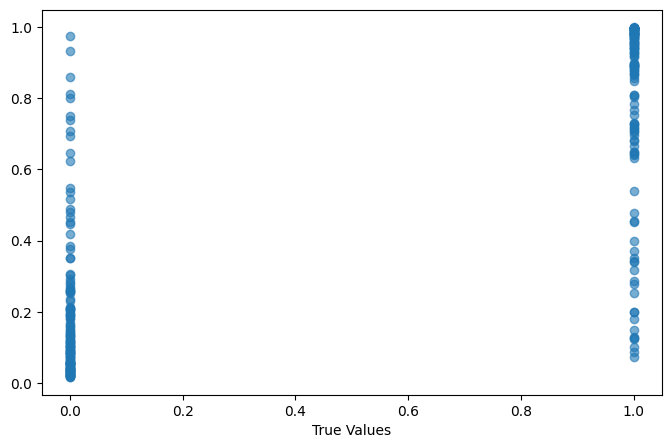

In [111]:
for epoch in range(epochs):
    optimiser.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    if torch.isnan(loss):
        print("Loss is NaN!")
        break
    loss.backward()
    optimiser.step()
#    if (epoch + 1) % 500 == 0:
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
print(outputs)

# Evaluate on training set
with torch.no_grad():
    outputs = model(inputs)
    preds = torch.sigmoid(outputs)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == targets).float().mean()
    print(f"Training Accuracy: {accuracy.item()*100:.2f}%")

    # Plot predictions vs. true values
    plt.figure(figsize=(8, 5))
    plt.scatter(targets.numpy(), preds.numpy(), alpha=0.6)
    plt.xlabel("True Values")

### testing

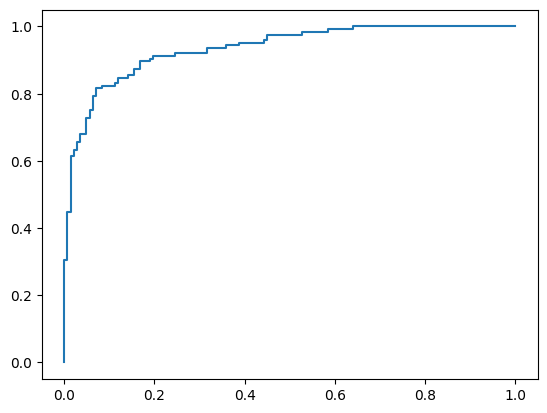

In [112]:
# roc curve
fpr1, tpr1, _ = roc_curve(targets.numpy(), preds.numpy())
plt.plot(fpr1, tpr1, label = "ROC Curve")

## AI2

### setup/params.

In [113]:
class SimpleNN(nn.Module): 
    def __init__(self): 
        super(SimpleNN, self).__init__() 
        self.fc1 = nn.Linear(13, 26)
        self.celu = nn.CELU()
        self.fc2 = nn.Linear(26, 32)
        self.rrelu2 = nn.RReLU()
        self.fc3 = nn.Linear(32, 26)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(26, 1) #output layer
        
    def forward(self, x): 
        x = self.fc1(x)
        x = self.celu(x)
        x = self.fc2(x)
        x = self.rrelu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x  # No sigmoid here; use BCEWithLogitsLoss

model = SimpleNN()
model

SimpleNN(
  (fc1): Linear(in_features=13, out_features=26, bias=True)
  (celu): CELU(alpha=1.0)
  (fc2): Linear(in_features=26, out_features=32, bias=True)
  (rrelu2): RReLU(lower=0.125, upper=0.3333333333333333)
  (fc3): Linear(in_features=32, out_features=26, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=26, out_features=1, bias=True)
)

### error calcs.

In [114]:
#calculate error
# Use BCEWithLogitsLoss for binary classification
criterion = nn.BCEWithLogitsLoss()
optimiser = optim.SGD(model.parameters(), lr=0.01)

# Ensure targets are shape (N, 1)
targets = targets.view(-1, 1)
print(targets)

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
      

### training

In [115]:
# learning rate and epochs (variables)
epochs = 10000
lr = 0.005

Epoch [1/10000], Loss: 0.6905
Epoch [2/10000], Loss: 0.6904
Epoch [3/10000], Loss: 0.6902
Epoch [4/10000], Loss: 0.6904
Epoch [5/10000], Loss: 0.6903
Epoch [6/10000], Loss: 0.6902
Epoch [7/10000], Loss: 0.6902
Epoch [8/10000], Loss: 0.6901
Epoch [9/10000], Loss: 0.6902
Epoch [10/10000], Loss: 0.6901
Epoch [11/10000], Loss: 0.6900
Epoch [12/10000], Loss: 0.6901
Epoch [13/10000], Loss: 0.6900
Epoch [14/10000], Loss: 0.6898
Epoch [15/10000], Loss: 0.6898
Epoch [16/10000], Loss: 0.6898
Epoch [17/10000], Loss: 0.6897
Epoch [18/10000], Loss: 0.6897
Epoch [19/10000], Loss: 0.6897
Epoch [20/10000], Loss: 0.6896
Epoch [21/10000], Loss: 0.6896
Epoch [22/10000], Loss: 0.6895
Epoch [23/10000], Loss: 0.6896
Epoch [24/10000], Loss: 0.6895
Epoch [25/10000], Loss: 0.6894
Epoch [26/10000], Loss: 0.6894
Epoch [27/10000], Loss: 0.6893
Epoch [28/10000], Loss: 0.6893
Epoch [29/10000], Loss: 0.6892
Epoch [30/10000], Loss: 0.6892
Epoch [31/10000], Loss: 0.6893
Epoch [32/10000], Loss: 0.6892
Epoch [33/10000],

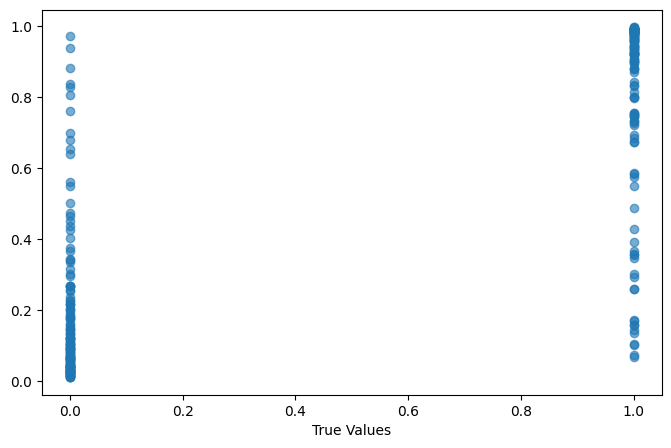

In [116]:
for epoch in range(epochs):
    optimiser.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    if torch.isnan(loss):
        print("Loss is NaN!")
        break
    loss.backward()
    optimiser.step()
#    if (epoch + 1) % 500 == 0:
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
print(outputs)

# Evaluate on training set
with torch.no_grad():
    outputs = model(inputs)
    preds = torch.sigmoid(outputs)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == targets).float().mean()
    print(f"Training Accuracy: {accuracy.item()*100:.2f}%")

    # Plot predictions vs. true values
    plt.figure(figsize=(8, 5))
    plt.scatter(targets.numpy(), preds.numpy(), alpha=0.6)
    plt.xlabel("True Values")

### testing

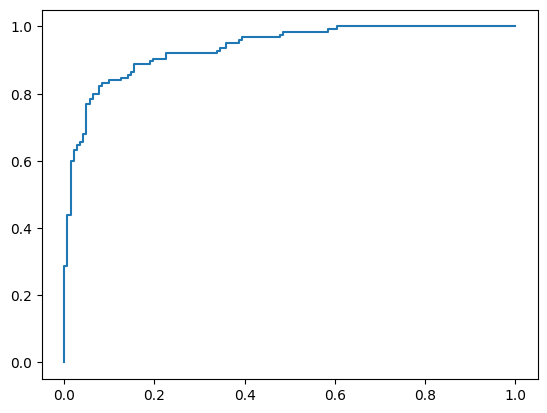

In [117]:
# roc curve
fpr2, tpr2, _ = roc_curve(targets.numpy(), preds.numpy())
plt.plot(fpr2, tpr2, label = "ROC Curve")

## comparison

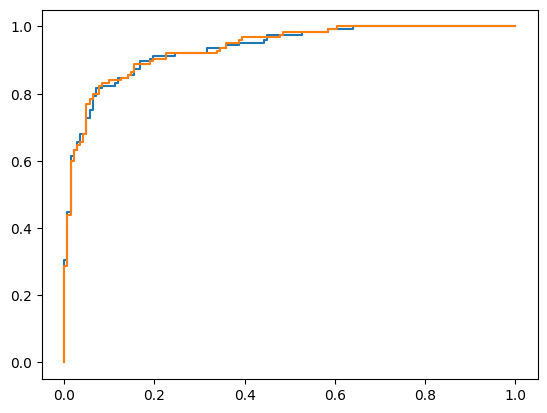

In [118]:
# roc curve
fpr2, tpr2, _ = roc_curve(targets.numpy(), preds.numpy())
plt.plot(fpr1, tpr1, label = "ROC Curve (ai1)")
plt.plot(fpr2, tpr2, label = "ROC Curve (ai2)")